In [51]:
import crypten
import torch
import numpy as np
import matplotlib.pyplot as plt
import crypten.mpc as mpc

import sys
sys.path.append("../") # go to parent dir
sys.path.append("../../") # go to parent parent dir
sys.path.append("../helpers/")
sys.path.append("../helpers/utils")
sys.path.append("../helpers/mpc")
import utils
import sparse_linreg_damgard

import time

crypten.init()

torch.set_num_threads(1)
torch.set_printoptions(precision=32) # default

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/opt/anaconda3/envs/mpc/lib/python3.7/site-packages/crypten/__init__.py:64: RuntimeWarning: CrypTen is already initialized.
  warnings.warn("CrypTen is already initialized.", RuntimeWarning)


In [75]:
@mpc.run_multiprocess(world_size=2)
def share_testing(noise_input, noise_output):
    noise_input_shared = crypten.cryptensor(noise_input, ptype=crypten.mpc.arithmetic)
    noise_output_shared = crypten.cryptensor(noise_output, ptype=crypten.mpc.arithmetic)

    crypten.print(f"Source {0} {noise_input_shared.get_plain_text()}")
    crypten.print(f"Source {0} {noise_input}")
    print("\n__________________________\n")
    crypten.print(f"Source {0} {noise_output_shared.get_plain_text()}")
    crypten.print(f"Source {0} {noise_output}")

In [77]:
noise_input = [-0.40807482,  1.07505626,  0.06985295, -0.07706185, -0.39470101]
noise_output = [-0.19805427,  0.26415289,  0.03860164,  0.63382055, 0.01970417]
share_testing(torch.tensor(noise_input), torch.tensor(noise_output));

Source 0 tensor([-0.4080657958984375,  1.0750427246093750,  0.0698394775390625,
        -0.0770568847656250, -0.3946990966796875])
__________________________


Source 0 tensor([-0.4080748260021210,  1.0750563144683838,  0.0698529481887817,
        -0.0770618468523026, -0.3947010040283203])

__________________________

Source 0 tensor([-0.1980438232421875,  0.2641448974609375,  0.0385894775390625,
         0.6338195800781250,  0.0196990966796875])
Source 0 tensor([-0.1980542689561844,  0.2641528844833374,  0.0386016406118870,
         0.6338205337524414,  0.0197041705250740])


In [18]:
def generate_nb_noise(n_succ, prob_succ, size, n_servers):
    full_noise = np.zeros(size)
    for i in range(n_servers):
        noise = np.random.negative_binomial(n_succ, prob_succ, size)
        full_noise += noise
    return full_noise

def generate_noise_nb(total_servers, corrupted_servers, ebs, size):
    noise_p = 1 - 2.71 ** (-ebs / 2)
    noise_input = generate_nb_noise(1 / (total_servers - corrupted_servers), noise_p, size, total_servers)
    noise_output = generate_nb_noise(1 / (total_servers - corrupted_servers), noise_p, size, 1)
    return noise_input, noise_output

In [23]:
def generate_laplace_noise(lmb, ebs, dta, s, d, n_servers):
    full_noise = np.zeros(d)
    for i in range(n_servers):
        s = max(s, 1) # to avoid generating zero noise when the sparsity is 0
        scale = (lmb / ebs) * (2 * np.sqrt(3 * s * np.log(1 / dta)))
        noise = np.random.laplace(0, scale, d)
        full_noise += noise
    return full_noise

In [242]:
order = 3
d = 500
T = 100
eta = 0.1
n = 1
k = 50

for noise_type in ['noise_output']: 
    data = utils.sample_dataset(n * (10 ** order), d, 0.05, k, 1)
    it_err, last_err = sparse_linreg_damgard.solve(data, (0.00005, 0.5, 0.5, noise_type), k, T, a=64, c=0, eta=0.1, eps=0.001)
    result[noise_type] = it_err
    print('done')

0
10
20
30
40
50
60
70
80
90
done


In [245]:
order = 3
d = 500
T = 100
eta = 0.1
n = 1
k = 50

for noise_type in ['noise_output_and_per_it']: 
    data = utils.sample_dataset(n * (10 ** order), d, 0.05, k, 1)
    it_err, last_err = sparse_linreg_damgard.solve(data, (0.00005, 0.5, 0.5, noise_type), k, T, a=64, c=0, eta=0.1, eps=0.001)
    result[noise_type] = it_err
    print('done')

0
10
20
30
40
50
60
70
80
90
done


In [246]:
order = 3
d = 500
T = 1000
eta = 0.1
n = 1
k = 50
result2 = {}

for noise_type in ['noise_output', 'noise_output_and_per_it']: 
    data = utils.sample_dataset(n * (10 ** order), d, 0.05, k, 1)
    it_err, last_err = sparse_linreg_damgard.solve(data, (0.00005, 0.5, 0.5, noise_type), k, T, a=64, c=0, eta=0.1, eps=0.001)
    result2[noise_type] = it_err
    print('done')

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
done
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
done


In [235]:
print(it_err_no_noise)

[0.967514486889491, 0.9361118617600657, 0.9057314152189754, 0.8763399015467752, 0.8479301203789905, 0.8204369702533932, 0.7938420133067972, 0.7681322629347105, 0.7432663264217405, 0.7192112456326838, 0.6959410671587104, 0.6734308517319458, 0.6516579252922803, 0.6306074543478439, 0.6102389988945545, 0.5905455385435572, 0.5714829725863713, 0.5530391820667824, 0.535207111442767, 0.5179560318734363, 0.5012663182269266, 0.4851211277729717, 0.4695118405432951, 0.4543990745675175, 0.43978943708961343, 0.42565710123491546, 0.41198163736968635, 0.3987469823494586, 0.3859445406706744, 0.373548708077828, 0.3615688380393945, 0.3499749525567899, 0.33875059055604084, 0.32789934193558185, 0.3173956572119773, 0.3072389575927993, 0.29739305341447986, 0.28787113758221866, 0.27865893495476673, 0.26973945220643236, 0.2611283907250459, 0.25278521209655663, 0.24471258646486244, 0.23689878233033865, 0.2293451614095834, 0.22204498240606665, 0.21496645995037822, 0.2081176060340727, 0.20149890812029284, 0.19508

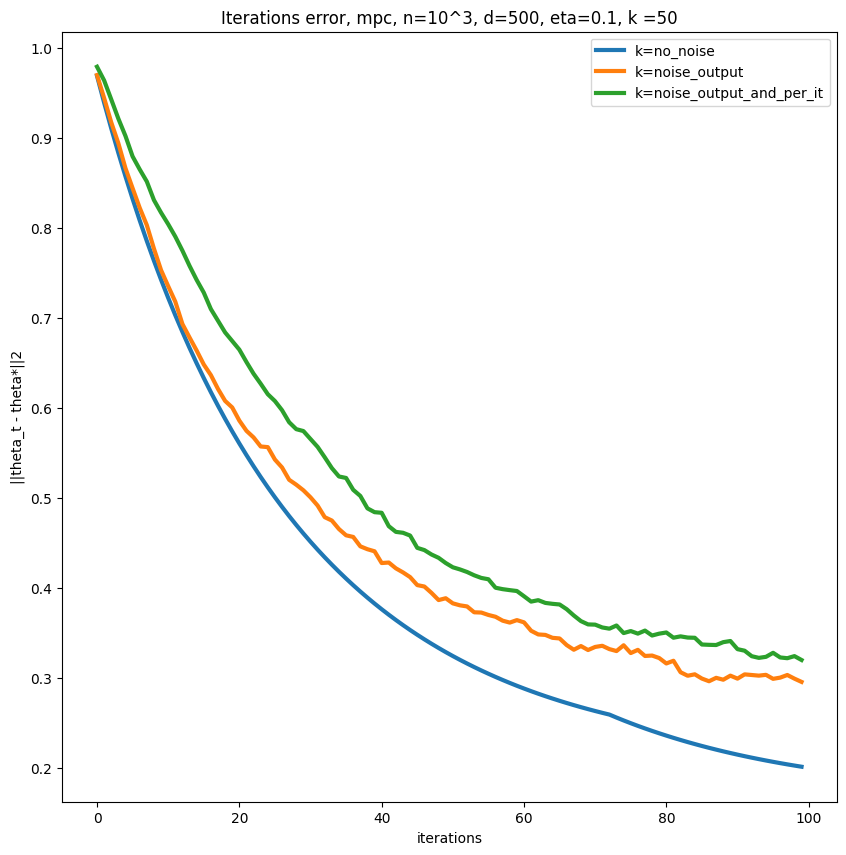

In [257]:
utils.plot_error_by_iteration_and_dict_key(
    result,
    title=f'Iterations error, mpc, n={n}0^{order}, d={d}, eta={eta}, k ={k}',
    xlabel="iterations",
    ylabel='||theta_t - theta*||2',
    line_label="k")

In [258]:
import json

with open('100it_no_noise.txt', 'w') as filehandle:
    json.dump(result['no_noise'], filehandle)